In [1]:
import numpy as np
import pandas as pd 

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [5]:
df=pd.read_csv('C:/Users/JISHAN/Downloads/prodigy/Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [11]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

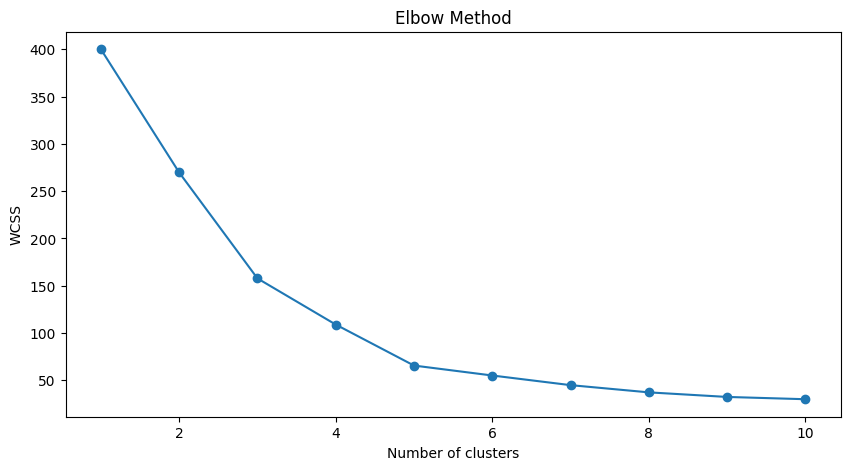

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [18]:
df['Cluster'] = y_kmeans

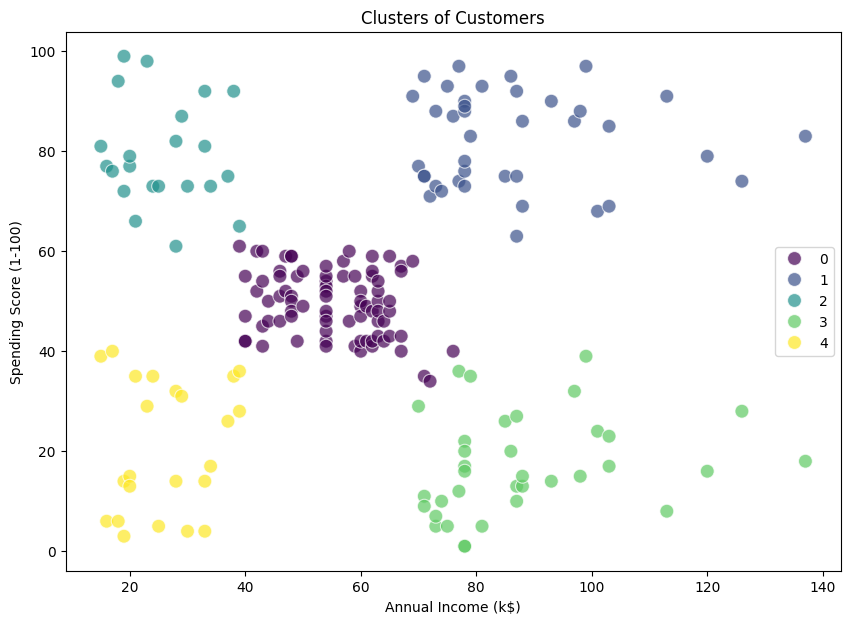

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [22]:
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia}")

Inertia (WCSS): 65.56840815571681


In [23]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5546571631111091
